# When t-SNE ?

In [1]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from data_utils import PCA, StandardScaler, TSNE, object_from_json_url

### Get Data

In [3]:
PENGUIN_URL = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/refs/heads/main/datasets/json/penguins.json"
penguin_data = object_from_json_url(PENGUIN_URL)

penguins_df = pd.DataFrame.from_records(penguin_data)
penguins_df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,1
1,Adelie,39.5,17.4,186.0,3800.0,0
2,Adelie,40.3,18.0,195.0,3250.0,0
3,Adelie,36.7,19.3,193.0,3450.0,0
4,Adelie,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207.0,4000.0,1
329,Chinstrap,43.5,18.1,202.0,3400.0,0
330,Chinstrap,49.6,18.2,193.0,3775.0,1
331,Chinstrap,50.8,19.0,210.0,4100.0,1


### Penguin Example

Explore the penguin data.

Let's encode the species column into integers.
It's a simple encoding, so we can just do it manually using a function and the `DataFrame.apply()` command.

In [4]:
species = list(penguins_df["species"].unique())

def species_to_label(s):
  return species.index(s)

penguins_df["label"] = penguins_df["species"].apply(species_to_label)

display(penguins_df)
penguins_df.shape

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,Adelie,39.1,18.7,181.0,3750.0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,0,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0
3,Adelie,36.7,19.3,193.0,3450.0,0,0
4,Adelie,39.3,20.6,190.0,3650.0,1,0
...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207.0,4000.0,1,2
329,Chinstrap,43.5,18.1,202.0,3400.0,0,2
330,Chinstrap,49.6,18.2,193.0,3775.0,1,2
331,Chinstrap,50.8,19.0,210.0,4100.0,1,2


(333, 7)

### Scale Features

Choose features to scale and reduce

In [5]:
# TODO: Separate features from the full DataFrame
X = penguins_df.drop(columns=["species", "label"])
y = penguins_df["species"]

# TODO: Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### PCA

We can try to simplify this data by performing `PCA` and combining some of the original features into _principal components_.

In [6]:
# TODO: create PCA with 3 components
pca = PCA(n_components=3)

# TODO: fit+transform
X_pca = pca.fit_transform(X_scaled)

# TODO: look at explained variance
pca.explained_variance()

np.float64(0.9456092586241773)

### Plots

In [7]:
def plot_2d_3d(mdf, colors=None):
  column_names = mdf.columns

  # First 2 PCs
  plt.scatter(mdf[column_names[0]], mdf[column_names[1]], c=colors)
  plt.xlabel(column_names[0])
  plt.ylabel(column_names[1])
  plt.title("2 Components")
  plt.show()

  # First 3 PCs
  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(projection='3d')

  ax.scatter(mdf[column_names[0]],
            mdf[column_names[1]],
            mdf[column_names[2]],
            c=colors)
  ax.set_xlabel(column_names[0])
  ax.set_ylabel(column_names[1])
  ax.set_zlabel(column_names[2])
  ax.set_title("3 Components")
  plt.show()

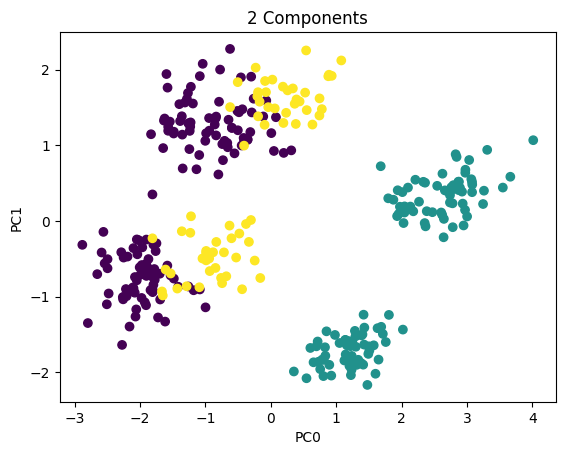

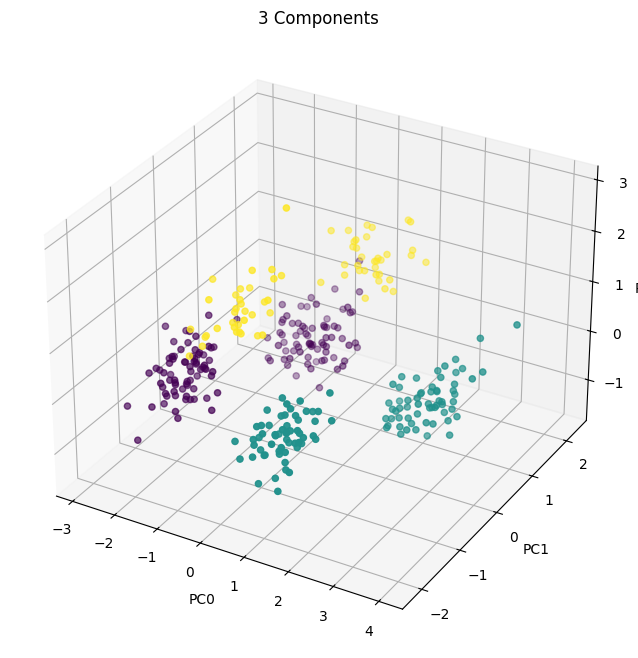

In [9]:
plot_2d_3d(X_pca, colors=penguins_df["label"])

Although it has combined some of the features, we can still see a lot of information from our original data.

### t-SNE

Repeat the above using t-SNE.

We already have scaled features, we just have to `fit_transform()` them it with a t-SNE object.

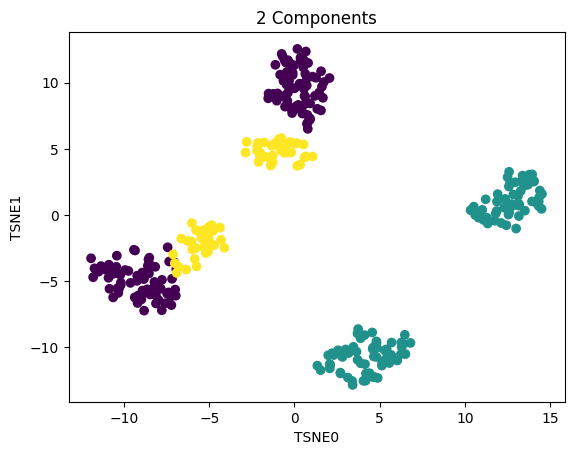

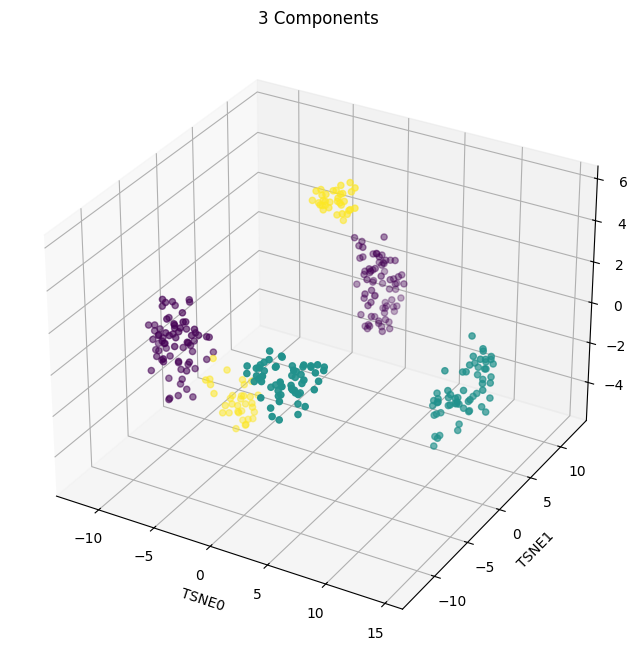

In [10]:
# TODO: create TSNE with 3 components
tsne = TSNE(n_components=3)

# TODO: fit+transform
X_tsne = tsne.fit_transform(X_scaled)
plot_2d_3d(X_tsne, colors=penguins_df["label"])

### Plots

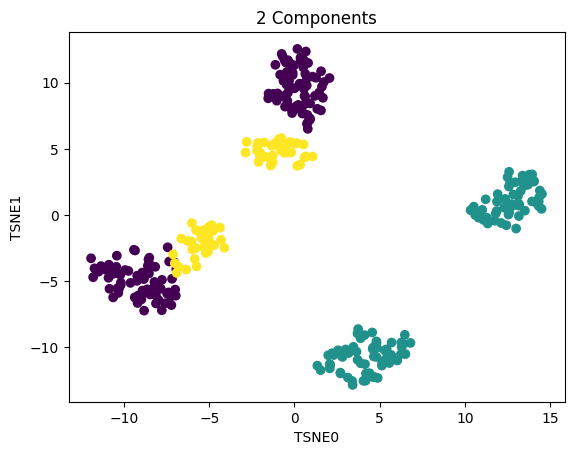

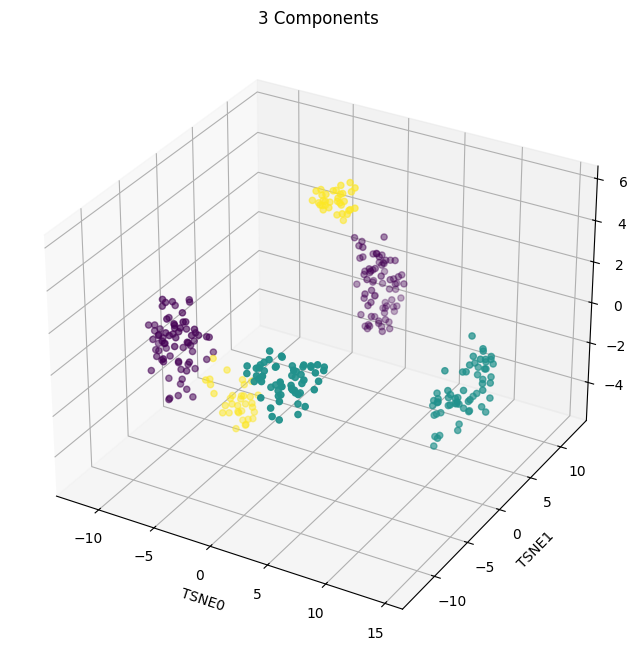

In [11]:
plot_2d_3d(X_tsne, colors=penguins_df["label"])